# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_data['Mouse ID'].unique())

249

In [3]:
dupe_test = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupe_test

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes = combined_data.loc[combined_data['Mouse ID']=='g989']
dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_combined_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_combined_data = combined_data[combined_data['Mouse ID'].isin(dupe_test)==False]
clean_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_volume = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_var=clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_std=clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_ser=clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

tumor_stats_by_drug = pd.concat([mean_tumor_volume, median_tumor_volume, tumor_volume_var, tumor_volume_std, tumor_volume_ser], axis=1)

tumor_stats_by_drug.columns=["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]

tumor_stats_by_drug.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats_by_drug_2 = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_stats_by_drug_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

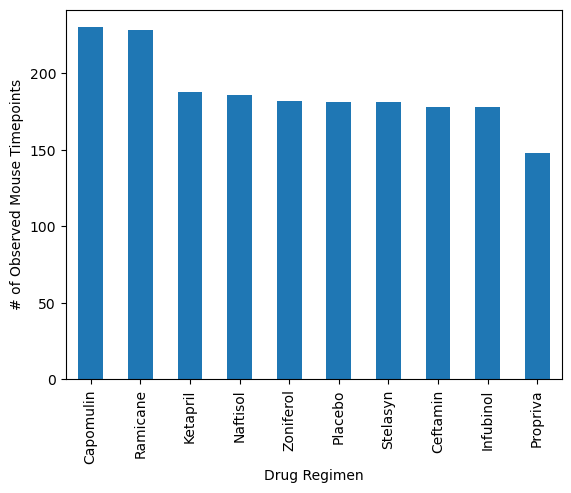

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_and_count = clean_combined_data.groupby('Drug Regimen')['Mouse ID'].count()
drug_and_count = drug_and_count.sort_values(ascending=False)
drug_and_count_bar = drug_and_count.plot(kind='bar')
drug_and_count_bar.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

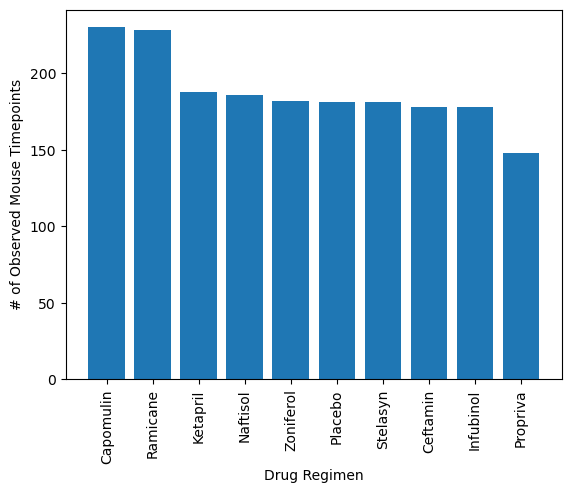

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_and_count.index
y_axis= drug_and_count

plt.bar(x_axis, y_axis, align="center")
plt.xticks(rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

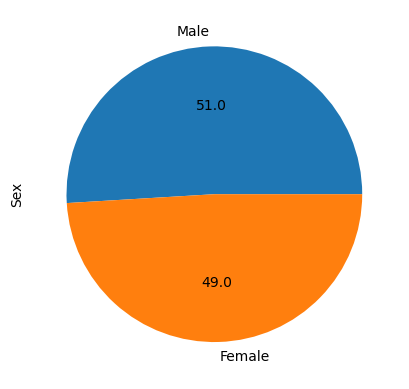

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = clean_combined_data.groupby('Sex')['Mouse ID'].count()
male_v_female = male_v_female.sort_values(ascending=False)
male_v_female_pie = male_v_female.plot(kind='pie', autopct='%.1f')
male_v_female_pie.set_ylabel('Sex')

plt.show()


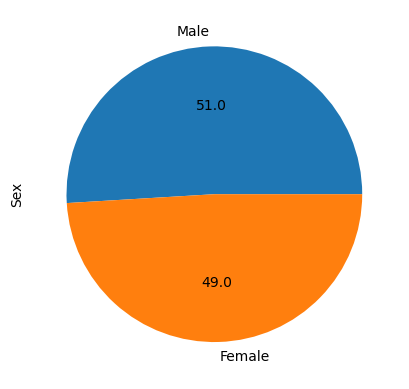

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_v_female, labels=male_v_female.index, autopct='%.1f')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grtst_timepoint = clean_combined_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
grtst_timepoint  = grtst_timepoint .reset_index()
clean_combined_w_grtst= grtst_timepoint.merge(clean_combined_data, on=['Mouse ID','Timepoint'], how="left")
clean_combined_w_grtst

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each_drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = clean_combined_w_grtst.loc[clean_combined_w_grtst['Drug Regimen'] == each_drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # combined_filter = (tumor_vol_list > upper_bound) | (tumor_vol_list < lower_bound)
    # outliers = smaller_drug_list.loc[combined_filter]
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{each_drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


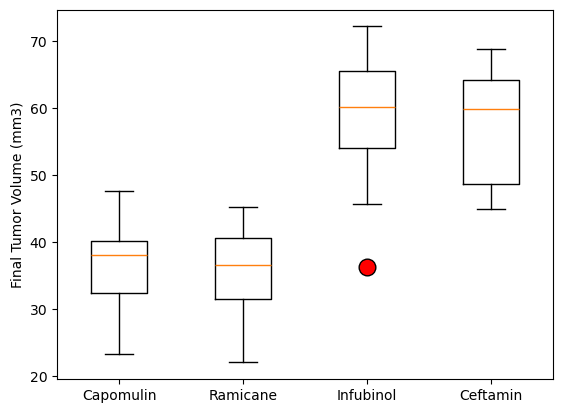

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_out = dict(markerfacecolor='red', markersize=12)
plt.boxplot(tumor_vol_list, labels=treatments, flierprops=red_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

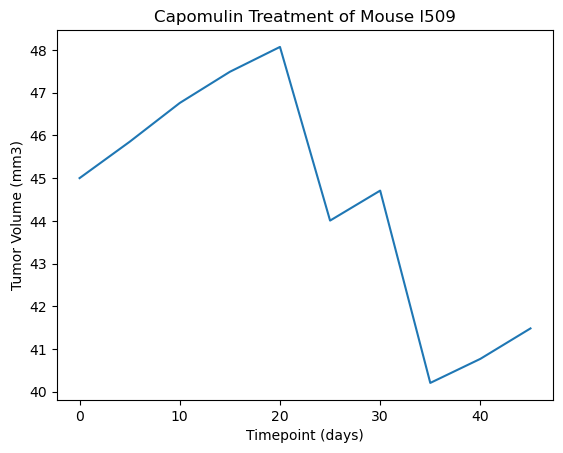

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_combined_data.loc[clean_combined_data['Drug Regimen']=='Capomulin']
capomulin_l509 = capomulin_mice.loc[capomulin_mice['Mouse ID']=='l509']
capomulin_l509 = capomulin_l509.set_index(['Timepoint'])['Tumor Volume (mm3)']
capomulin_l509.plot(xlabel='Timepoint (days)',ylabel='Tumor Volume (mm3)', title='Capomulin Treatment of Mouse l509')
plt.show()

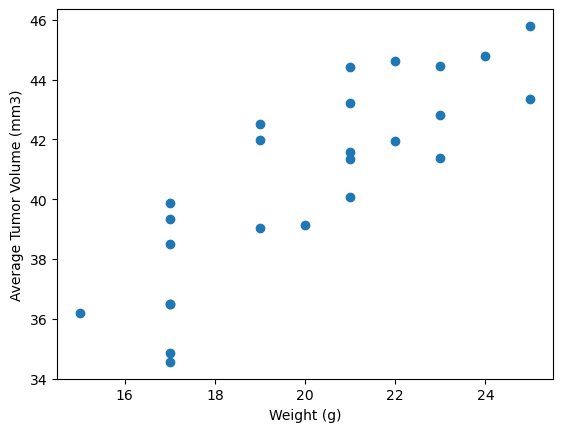

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice_byID = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_mice_byID  = capomulin_mice_byID.reset_index()
capamuiln_mice_wt_byID = capomulin_mice.groupby('Mouse ID')['Weight (g)'].mean()
capomulin_mice_wt_size = capomulin_mice_byID.merge(capamuiln_mice_wt_byID, on=['Mouse ID'], how="left")
plt.scatter(capomulin_mice_wt_size['Weight (g)'],capomulin_mice_wt_size['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volum is: 0.84


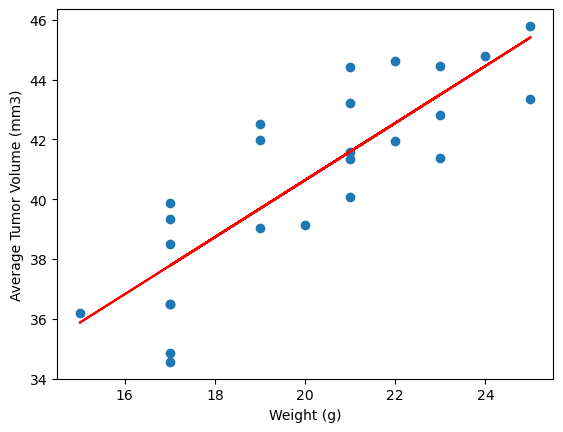

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_mice_wt_size['Weight (g)']
y_values = capomulin_mice_wt_size['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volum is: {round(rvalue,2)}')
plt.plot(x_values,regress_values,"r-")
plt.show()